This notebook deals with the contents in Section 4.4.12.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cmdstanpy import CmdStanModel

# Load and show data

In [2]:
df = pd.read_csv("./data/data-salary.txt")
print(df.count())
df.head(5)

X    20
Y    20
dtype: int64


,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546


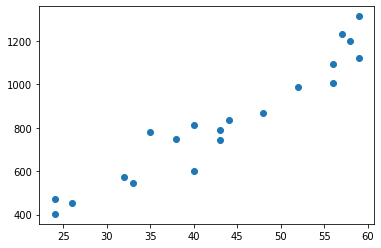

In [3]:
# Fig 4.2
plt.plot(df["X"], df["Y"], 'o')

In [4]:
X_new = np.arange(23, 61, 1)
X_new

array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60])

# Run Stan

In [5]:
model = CmdStanModel(stan_file="model/model4-4.stan")
print(model)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/chapter04/model/model4-4


CmdStanModel: name=model4-4
	 stan_file=/workdir/chapter04/model/model4-4.stan
	 exe_file=/workdir/chapter04/model/model4-4
	 compiler_optons=stanc_options=None, cpp_options=None


In [6]:
data = {
    "N": len(df),
    "X": df["X"].values,
    "Y": df["Y"].values,
    "N_new": len(X_new), 
    "X_new": X_new
}

In [7]:
# sampling
fit = model.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 2


You can run a stan model whose model file does not contain `generated quantities` blocks, and then using another stan file with `generated quantities` block to generate quantities using `model.generate_quantities` method.

See https://cmdstanpy.readthedocs.io/en/latest/generate_quantities.html for detail.

# Access the result

In [8]:
type(fit)

cmdstanpy.stanfit.CmdStanMCMC

In [9]:
fit

CmdStanMCMC: model=model4-4 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmp5sn9drph/model4-4-202010261232-1-8tvmgxeg.csv
	/tmp/tmp5sn9drph/model4-4-202010261232-2-p74mmtq4.csv
	/tmp/tmp5sn9drph/model4-4-202010261232-3-i7dwm_bk.csv
	/tmp/tmp5sn9drph/model4-4-202010261232-4-mufiko4x.csv
 output_files:
	/tmp/tmp5sn9drph/model4-4-202010261232-1-8tvmgxeg-stdout.txt
	/tmp/tmp5sn9drph/model4-4-202010261232-2-p74mmtq4-stdout.txt
	/tmp/tmp5sn9drph/model4-4-202010261232-3-i7dwm_bk-stdout.txt
	/tmp/tmp5sn9drph/model4-4-202010261232-4-mufiko4x-stdout.txt

In [10]:
print(fit.chains)
print(fit.chain_ids)

4
[1, 2, 3, 4]


In [11]:
print(fit.num_draws)
print(fit.draws().shape)

1000
(1000, 4, 106)


In [12]:
print(fit.column_names)

('lp__', 'accept_stat__', 'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__', 'a', 'b', 'sigma', 'y_base.1', 'y_base.2', 'y_base.3', 'y_base.4', 'y_base.5', 'y_base.6', 'y_base.7', 'y_base.8', 'y_base.9', 'y_base.10', 'y_base.11', 'y_base.12', 'y_base.13', 'y_base.14', 'y_base.15', 'y_base.16', 'y_base.17', 'y_base.18', 'y_base.19', 'y_base.20', 'y_base_new.1', 'y_base_new.2', 'y_base_new.3', 'y_base_new.4', 'y_base_new.5', 'y_base_new.6', 'y_base_new.7', 'y_base_new.8', 'y_base_new.9', 'y_base_new.10', 'y_base_new.11', 'y_base_new.12', 'y_base_new.13', 'y_base_new.14', 'y_base_new.15', 'y_base_new.16', 'y_base_new.17', 'y_base_new.18', 'y_base_new.19', 'y_base_new.20', 'y_base_new.21', 'y_base_new.22', 'y_base_new.23', 'y_base_new.24', 'y_base_new.25', 'y_base_new.26', 'y_base_new.27', 'y_base_new.28', 'y_base_new.29', 'y_base_new.30', 'y_base_new.31', 'y_base_new.32', 'y_base_new.33', 'y_base_new.34', 'y_base_new.35', 'y_base_new.36', 'y_base_new.37', 'y_base_new.

In [13]:
fit.stan_variables()

{'a': array([-211.16  ,  -30.7859, -107.537 , ...,  -59.4904,  -42.1426,
         -74.8148]),
 'b': array([24.009 , 20.2563, 21.919 , ..., 20.1804, 20.5559, 20.542 ]),
 'sigma': array([ 77.5687, 106.752 ,  64.4804, ...,  74.4298,  76.9878,  82.4268]),
 'y_base': array([[ 365.056,  365.056,  413.073, ..., 1181.36 , 1205.37 , 1205.37 ],
        [ 455.365,  455.365,  495.878, ..., 1144.08 , 1164.34 , 1164.34 ],
        [ 418.519,  418.519,  462.357, ..., 1163.76 , 1185.68 , 1185.68 ],
        ...,
        [ 424.84 ,  424.84 ,  465.201, ..., 1110.98 , 1131.16 , 1131.16 ],
        [ 451.198,  451.198,  492.31 , ..., 1150.1  , 1170.65 , 1170.65 ],
        [ 418.193,  418.193,  459.277, ..., 1116.62 , 1137.16 , 1137.16 ]]),
 'y_base_new': array([[ 341.047,  365.056,  389.064, ..., 1181.36 , 1205.37 , 1229.38 ],
        [ 435.109,  455.365,  475.622, ..., 1144.08 , 1164.34 , 1184.59 ],
        [ 396.6  ,  418.519,  440.438, ..., 1163.76 , 1185.68 , 1207.6  ],
        ...,
        [ 404.66 ,  4

In [14]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-93.5867,0.032714,1.23794,-96.0456,-93.2727,-92.21240,1431.96,2481.73,1.00038
a,-118.9400,2.120300,73.32010,-236.9870,-121.4770,5.87904,1195.78,2072.41,1.00306
b,21.8890,0.047019,1.63689,19.1082,21.9190,24.59290,1211.98,2100.48,1.00342
sigma,85.1907,0.365158,15.04430,64.1720,83.1215,113.26200,1697.40,2941.77,1.00152
y_base[1],406.0000,1.000000,37.00000,346.0000,406.0000,468.00000,1315.00,2279.00,1.00000
...,...,...,...,...,...,...,...,...,...
y_new[34],1108.0000,1.400000,90.00000,961.0000,1108.0000,1256.00000,4012.00,6953.00,1.00000
y_new[35],1129.0000,1.600000,92.00000,979.0000,1128.0000,1280.00000,3424.00,5934.00,1.00000
y_new[36],1151.0000,1.600000,93.00000,1004.0000,1149.0000,1309.00000,3532.00,6120.00,1.00000


# Diagnostics

In [15]:
print(fit.diagnose())

INFO:cmdstanpy:Processing csv files: /tmp/tmp5sn9drph/model4-4-202010261232-1-8tvmgxeg.csv, /tmp/tmp5sn9drph/model4-4-202010261232-2-p74mmtq4.csv, /tmp/tmp5sn9drph/model4-4-202010261232-3-i7dwm_bk.csv, /tmp/tmp5sn9drph/model4-4-202010261232-4-mufiko4x.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


Processing csv files: /tmp/tmp5sn9drph/model4-4-202010261232-1-8tvmgxeg.csv, /tmp/tmp5sn9drph/model4-4-202010261232-2-p74mmtq4.csv, /tmp/tmp5sn9drph/model4-4-202010261232-3-i7dwm_bk.csv, /tmp/tmp5sn9drph/model4-4-202010261232-4-mufiko4x.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


# Predictive distribution

Manually calculate predictive distribution from posterior samples

In [16]:
for key, val in fit.stan_variables().items():
    print(key, val.shape)

a (4000,)
b (4000,)
sigma (4000,)
y_base (4000, 20)
y_base_new (4000, 38)
y_new (4000, 38)


In [17]:
y_base_new_percentiles = np.percentile(fit.stan_variable("y_base_new"), [2.5, 25.0, 50.0, 75.0, 97.5], axis=0)
y_new_percentiles = np.percentile(fit.stan_variable("y_new"), [2.5, 25.0, 50.0, 75.0, 97.5], axis=0)

y_base_new_percentiles.shape, y_new_percentiles.shape

((5, 38), (5, 38))

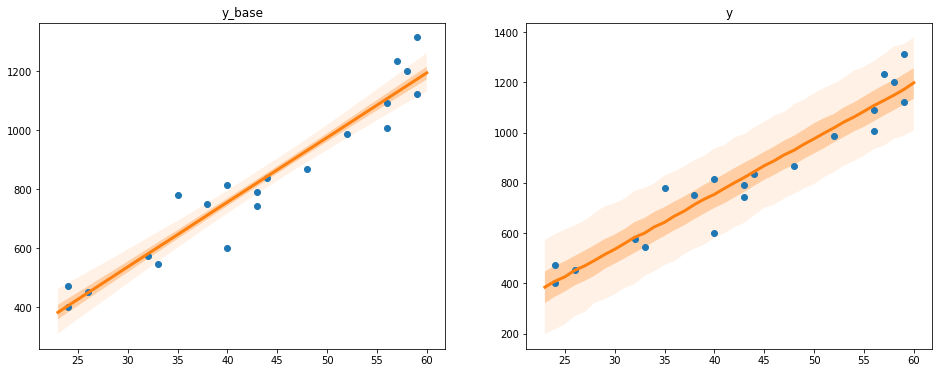

In [18]:
# Fig 4.8
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax = axes[0]
ax.plot(df["X"], df["Y"], "o")
ax.fill_between(X_new, y_base_new_percentiles[0], y_base_new_percentiles[4], facecolor="C1", alpha=0.1)
ax.fill_between(X_new, y_base_new_percentiles[1], y_base_new_percentiles[3], facecolor="C1", alpha=0.3)
ax.plot(X_new, y_base_new_percentiles[2], color="C1", linewidth=3)
ax.set_title("y_base")

ax = axes[1]
ax.plot(df["X"], df["Y"], "o")
ax.fill_between(X_new, y_new_percentiles[0], y_new_percentiles[4], facecolor='C1', alpha=0.1)
ax.fill_between(X_new, y_new_percentiles[1], y_new_percentiles[3], facecolor='C1', alpha=0.3)
ax.plot(X_new, y_new_percentiles[2], color="C1", linewidth=3)
ax.set_title("y")
fig.show()